## Exploring World Bank data using WBGAPI

In [1]:
## install World Bank API,

# !pip install wbgapi


In [2]:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Choosing countries

In [4]:
countries = ['ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEA', 'BEC', 'BEL', 
             'BEN', 'BFA', 'BGD', 'BGR', 'BHI', 'BHR', 'BHS', 'BIH', 'BLA', 'BLR', 'BLZ', 'BMN', 
             'COL', 'COM', 'CPV', 'CRI', 'CSA', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEA', 
             'DNS', 'DOM', 'DSA', 'DSF', 'DSS', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'ECU']

Search for identifiers:

wb.search("gdp current")

We are interested in:

- GDP (current US$)

- Population, total

In [5]:
indicators = [
    'AG.LND.FRST.K2',
    'EG.ELC.ACCS.ZS',
    'EN.ATM.CO2E.PC'
]


Display identifiers info:

In [6]:
wb.series.info(indicators)

id,value
EG.ELC.ACCS.ZS,Access to electricity (% of population)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
AG.LND.FRST.K2,Forest area (sq. km)
,3 elements


## Comparing 3 indicators in 48 countries

### Forest area (sq. km)

In [7]:
# specicif time range
df0 = wb.data.DataFrame(indicators, countries, time=range(2016, 2021))
df0.head()

C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


YR2016         YR2017         YR2018    YR2019  \
economy series                                                                  
ARE     AG.LND.FRST.K2    3173.000000    3173.000000    3173.000000    3173.0   
        EG.ELC.ACCS.ZS     100.000000     100.000000     100.000000     100.0   
        EN.ATM.CO2E.PC      21.307610      21.950614      20.797498       NaN   
ARG     AG.LND.FRST.K2  290100.000000  288990.000000  287910.000000  286810.0   
        EG.ELC.ACCS.ZS      99.956017     100.000000     100.000000     100.0   

                          YR2020  
economy series                    
ARE     AG.LND.FRST.K2    3173.0  
        EG.ELC.ACCS.ZS       NaN  
        EN.ATM.CO2E.PC       NaN  
ARG     AG.LND.FRST.K2  285730.0  
        EG.ELC.ACCS.ZS       NaN

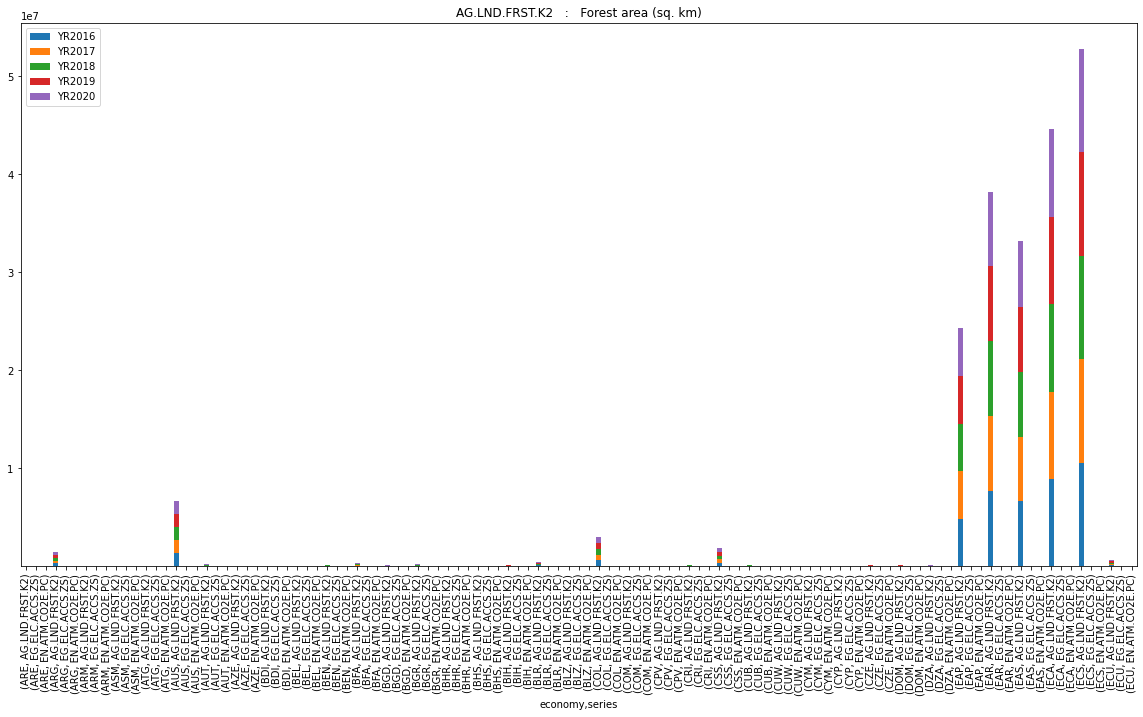

In [8]:
df0.plot(kind='bar',stacked=True, figsize = (20,10))
plt.title(f'{indicators[0]}   :   Forest area (sq. km)')
plt.show()

## Access to electricity (% of population)

In [9]:
df1 = wb.data.DataFrame(indicators[1], countries, time=range(2016, 2021))
df1.head()


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,
ARE,100.000000,100.0,100.000000,100.0,NaN
ARG,99.956017,100.0,100.000000,100.0,NaN
ARM,99.800000,99.7,99.900000,100.0,NaN
ASM,NaN,NaN,NaN,NaN,NaN
ATG,100.000000,100.0,99.999725,100.0,NaN


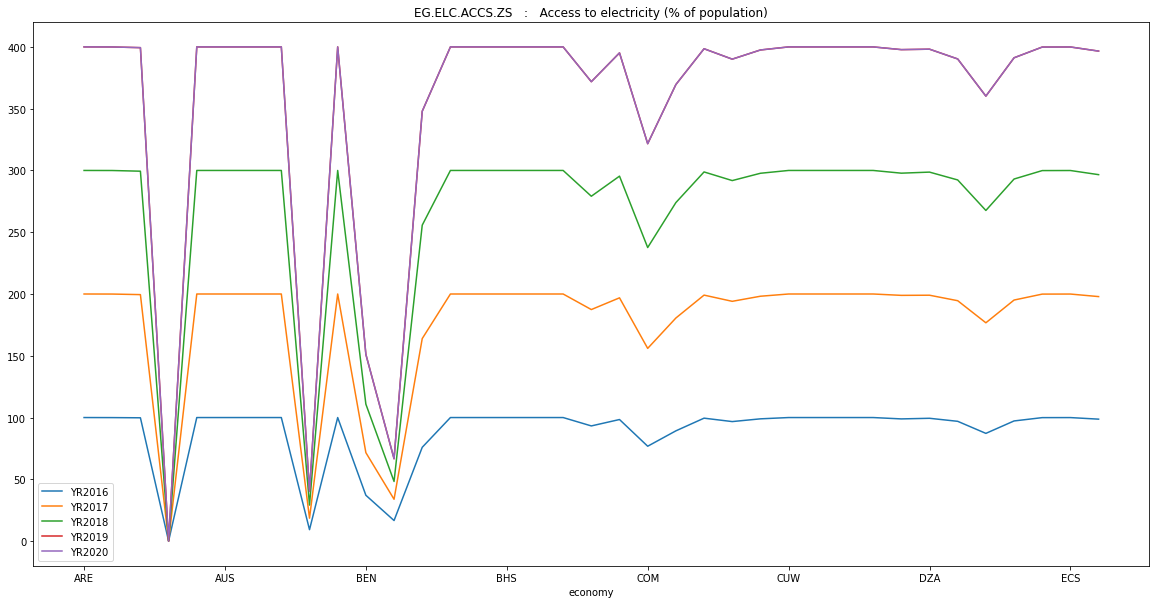

In [10]:
df1.plot(kind='line', stacked = True,  figsize = (20,10))
plt.title(f'{indicators[1]}   :   Access to electricity (% of population)')
plt.show()

## CO2 emissions (metric tons per capita)

In [11]:
df2 = wb.data.DataFrame(indicators[2], countries, time=range(2016, 2021))
df2.tail()

C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,
EAR,2.199832,2.247697,2.278146,NaN,NaN
EAS,6.140697,6.210897,6.333893,NaN,NaN
ECA,6.877674,6.974275,7.074187,NaN,NaN
ECS,6.685451,6.722144,6.690481,NaN,NaN
ECU,2.365516,2.249580,2.313812,NaN,NaN


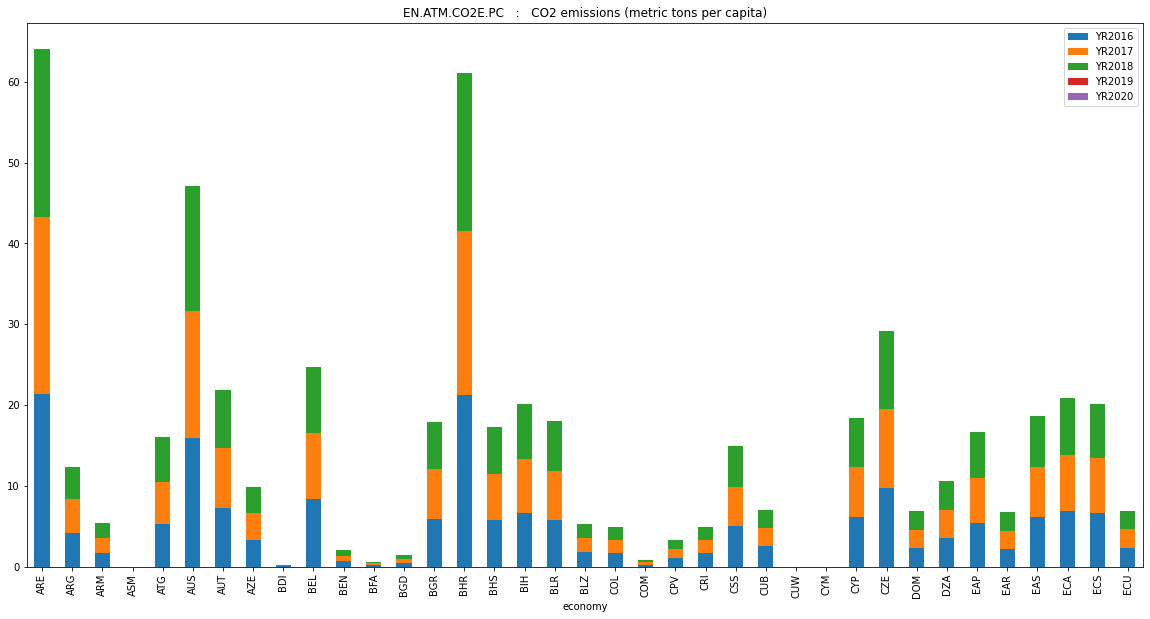

In [12]:
df2.plot(kind='bar', stacked = True, figsize = (20,10))
plt.title(f'{indicators[2]}   :   CO2 emissions (metric tons per capita)')
plt.show()

df2 = wb.data.DataFrame(indicators, 'WLD', time=range(2016, 2021))
df2

# understand correlations between indicators

### chech for correlation between Access to electricity and CO2 emissions

C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2014


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,19.951852
ARG,100.000000,4.216361
ARM,99.710000,1.881608
ASM,NaN,NaN
ATG,100.000000,5.185713
AUS,100.000000,15.755876
AUT,100.000000,7.253384
AZE,100.000000,3.422101
BDI,7.000000,0.039617


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2015


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,20.948092
ARG,99.811684,4.314434
ARM,100.000000,1.825292
ASM,NaN,NaN
ATG,100.000000,5.236665
AUS,100.000000,15.786449
AUT,100.000000,7.306745
AZE,100.000000,3.333906
BDI,8.403090,0.040354


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2016


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,21.307610
ARG,99.956017,4.227539
ARM,99.800000,1.726753
ASM,NaN,NaN
ATG,100.000000,5.289886
AUS,100.000000,15.872080
AUT,100.000000,7.255627
AZE,100.000000,3.347062
BDI,9.251800,0.043860


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2017


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,21.950614
ARG,100.000000,4.089472
ARM,99.700000,1.806581
ASM,NaN,NaN
ATG,100.000000,5.239717
AUS,100.000000,15.738647
AUT,100.000000,7.482751
AZE,100.000000,3.244357
BDI,9.300000,0.052646


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2018


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,20.797498
ARG,100.000000,3.987234
ARM,99.900000,1.880246
ASM,NaN,NaN
ATG,99.999725,5.504663
AUS,100.000000,15.475516
AUT,100.000000,7.146638
AZE,100.000000,3.221402
BDI,10.598615,0.052795


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2019


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,100.000000,NaN
ARG,100.000000,NaN
ARM,100.000000,NaN
ASM,NaN,NaN
ATG,100.000000,NaN
AUS,100.000000,NaN
AUT,100.000000,NaN
AZE,100.000000,NaN
BDI,11.064797,NaN


C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


Data for year  2020


,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC
economy,,
ARE,NaN,NaN
ARG,NaN,NaN
ARM,NaN,NaN
ASM,NaN,NaN
ATG,NaN,NaN
AUS,NaN,NaN
AUT,NaN,NaN
AZE,NaN,NaN
BDI,NaN,NaN


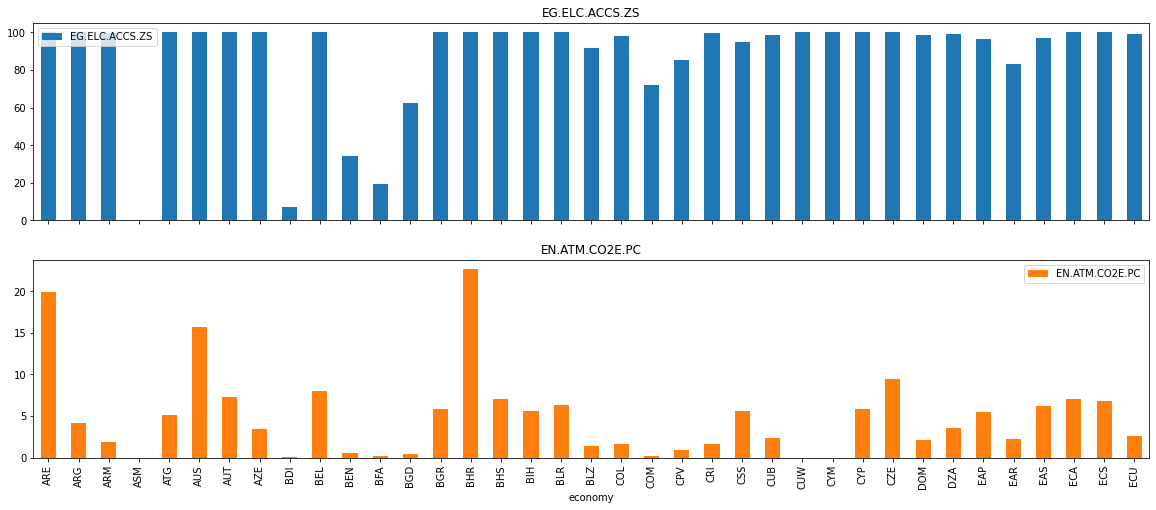

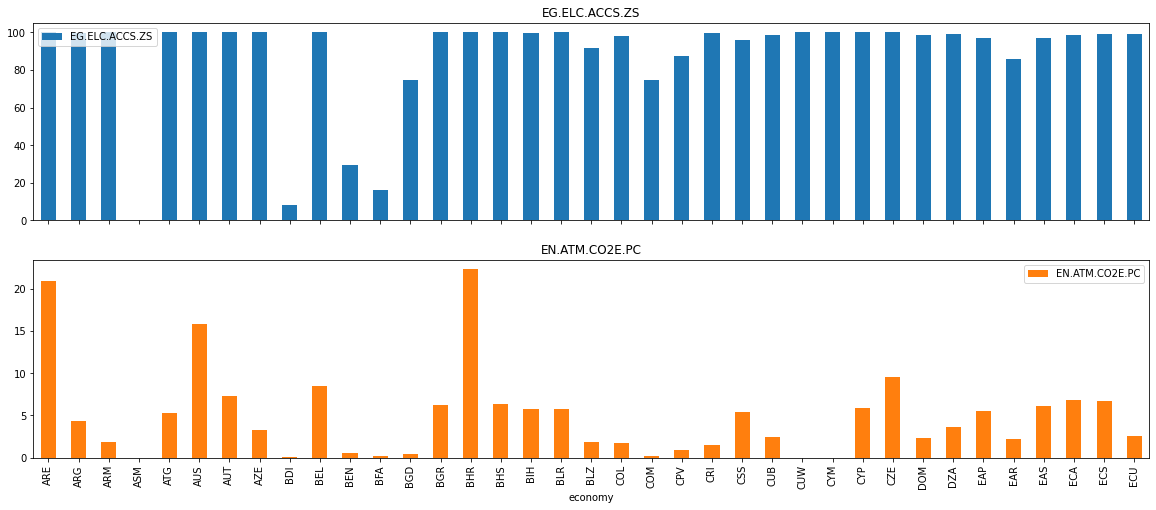

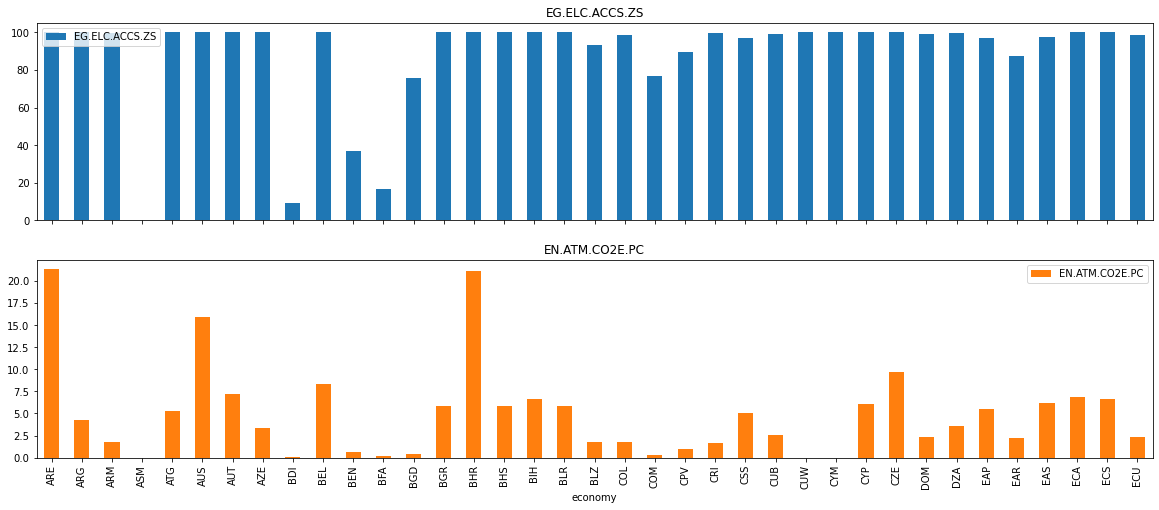

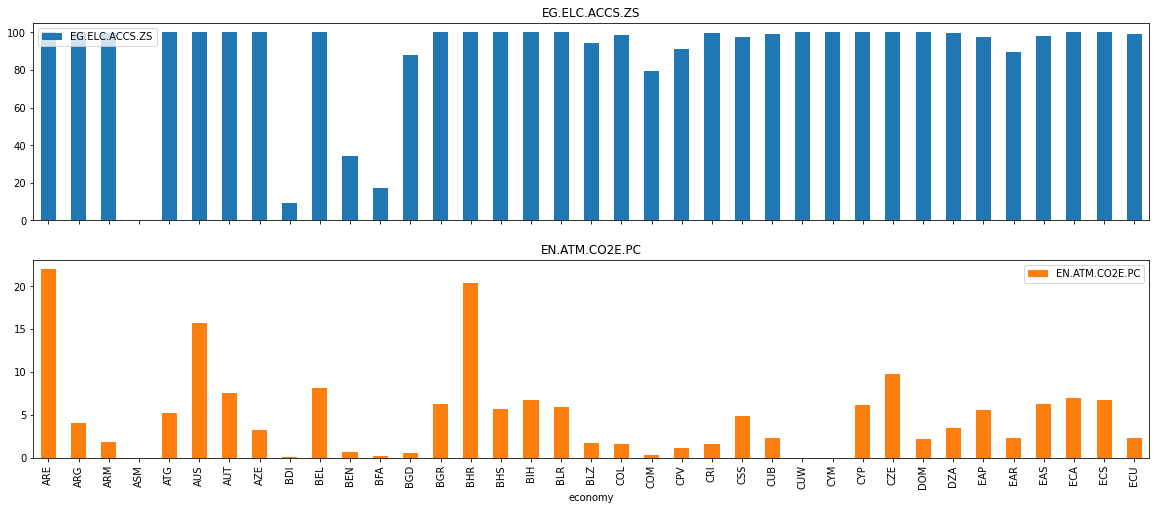

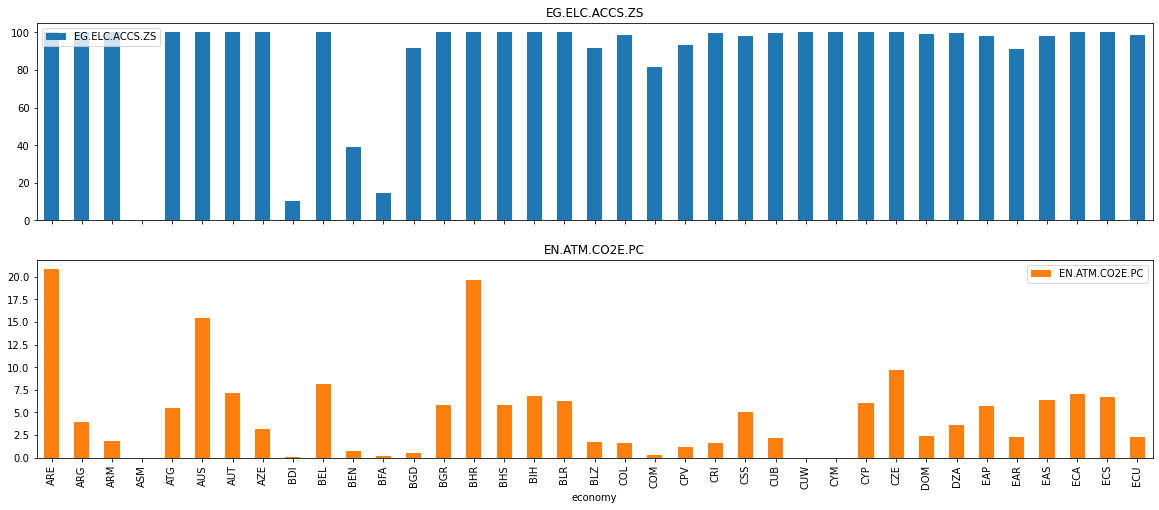

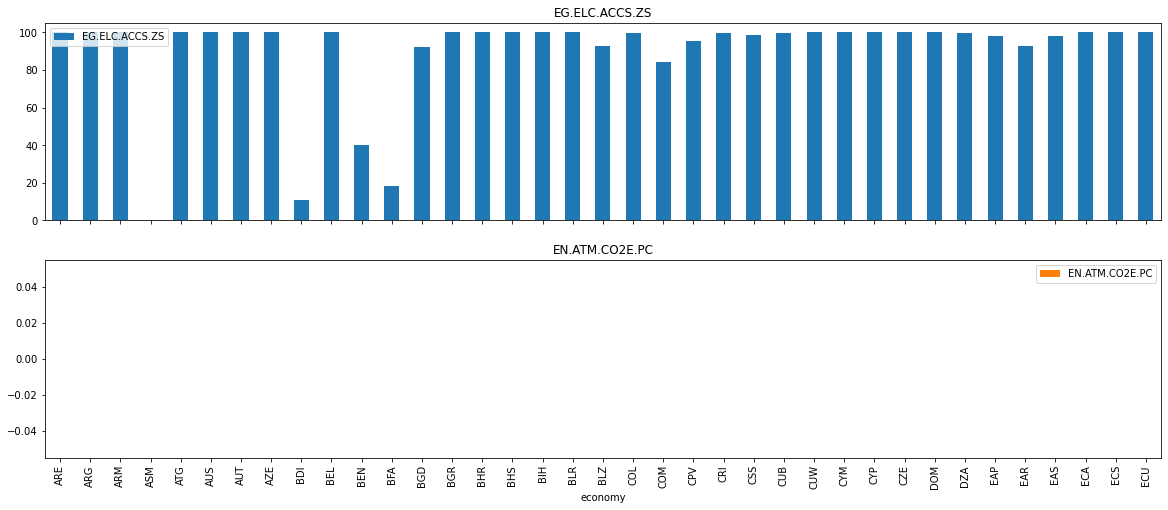

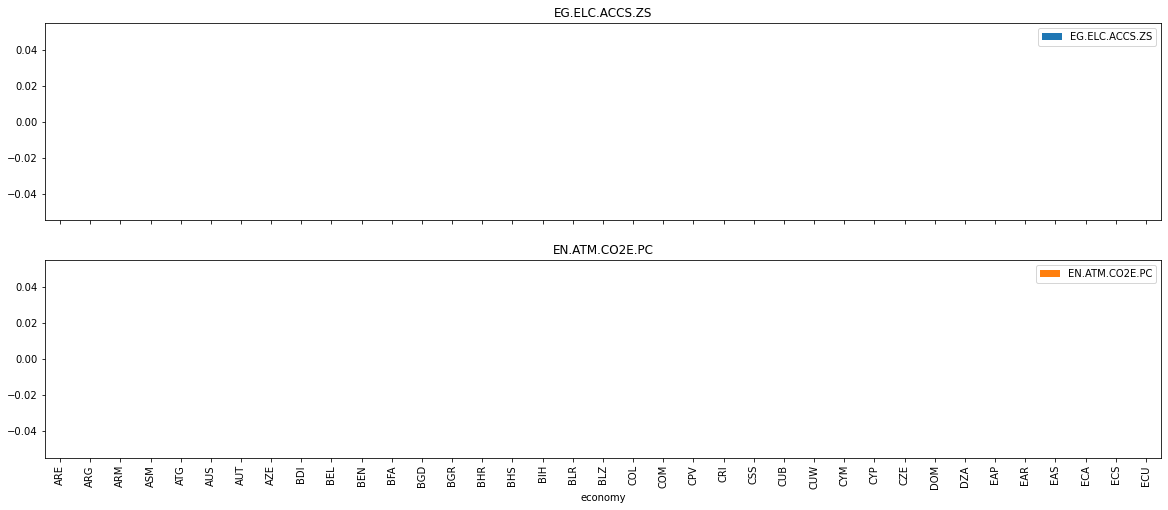

In [13]:
time = range(2014, 2021)
for i in time:
    ind1_data = wb.data.DataFrame(indicators[1], countries, time = i)
    ind2_data = wb.data.DataFrame(indicators[2], countries, time = i)
#     merge
    merge_data = ind1_data.merge(ind2_data, on = 'economy')
    merge_plot =merge_data.plot(kind = 'bar', subplots = True, figsize = (20,8))
    print("Data for year ", i)
    merge_plot
    display(merge_data)
    

In [14]:
df1.columns.values

array(['YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020'], dtype=object)

In [15]:
df_ind1 = wb.data.DataFrame(indicators[2], countries, time = range(2016, 2021))
df_ind2 = wb.data.DataFrame(indicators[1], countries, time = range(2016, 2021))

C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values
C:\Users\kingo\Anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


In [16]:
df_merge = df_ind1.merge(df_ind2, on = 'economy')

In [17]:
df_merge.corr()

,YR2016_x,YR2017_x,YR2018_x,YR2019_x,YR2020_x,YR2016_y,YR2017_y,YR2018_y,YR2019_y,YR2020_y
YR2016_x,1.000000,0.999077,0.998809,NaN,NaN,0.391446,0.369744,0.361879,0.351288,NaN
YR2017_x,0.999077,1.000000,0.999331,NaN,NaN,0.390291,0.368696,0.360956,0.350292,NaN
YR2018_x,0.998809,0.999331,1.000000,NaN,NaN,0.401426,0.379390,0.371426,0.360598,NaN
YR2019_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2020_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2016_y,0.391446,0.390291,0.401426,NaN,NaN,1.000000,0.995483,0.991598,0.990508,NaN
YR2017_y,0.369744,0.368696,0.379390,NaN,NaN,0.995483,1.000000,0.998223,0.997901,NaN
YR2018_y,0.361879,0.360956,0.371426,NaN,NaN,0.991598,0.998223,1.000000,0.999438,NaN
YR2019_y,0.351288,0.350292,0.360598,NaN,NaN,0.990508,0.997901,0.999438,1.000000,NaN
YR2020_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

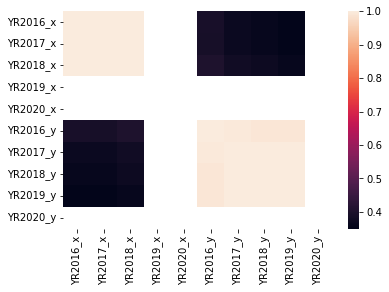

In [18]:
sns.heatmap(df_merge.corr())